## NVIDIA NVDA GC AAPL

## 1. Stationarity

- Before applying Granger Causality test, it is necessary to test for stationary. \
- Augmented Dickey-Fuller or Phillips-Perron are tests for stationary. \
- Null hypothesis: time series has at least one unit root (i.e. non-stationary).
- Alternative hypothesis: time series does not have unit roots. d. 

## 2. GC for non-stationary series (Toda & Yamamoto 1995)
- Check to see wheter the two series are cointegrate.
- Apply GC for both directions

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
## https://www.machinelearningplus.com/time-series/granger-causality-test-in-python/
def grangers_causation_matrix(data, variables,test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=10, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(10)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import statsmodels

In [4]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() 

## AAPL data from 2021 to 2023
data_aapl_2023 = pdr.get_data_yahoo("AAPL", start="2023-01-01", end="2023-12-31")
data_aapl_2022 = pdr.get_data_yahoo("AAPL", start="2022-01-01", end="2022-12-31")
data_aapl_2021 = pdr.get_data_yahoo("AAPL", start="2021-01-01", end="2021-12-31")

## TSMC data from 2021 to 2023
## AAPL data from 2021 to 2023
data_nvda_2023 = pdr.get_data_yahoo("NVDA", start="2023-01-01", end="2023-12-31")
data_nvda_2022 = pdr.get_data_yahoo("NVDA", start="2022-01-01", end="2022-12-31")
data_nvda_2021 = pdr.get_data_yahoo("NVDA", start="2021-01-01", end="2021-12-31")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## Compute Adj Close Diff and Daily Return for AAPL

In [5]:
data_aapl_2023['Adj Close Diff'] = data_aapl_2023['Adj Close'].diff()
data_aapl_2023['Adj Close Prev'] = data_aapl_2023['Adj Close'].shift(periods=1)
data_aapl_2023['Daily Return'] = (data_aapl_2023['Adj Close'] - data_aapl_2023['Adj Close Prev'])/data_aapl_2023['Adj Close Prev']

data_aapl_2022['Adj Close Diff'] = data_aapl_2022['Adj Close'].diff()
data_aapl_2022['Adj Close Prev'] = data_aapl_2022['Adj Close'].shift(periods=1)
data_aapl_2022['Daily Return'] = (data_aapl_2022['Adj Close'] - data_aapl_2022['Adj Close Prev'])/data_aapl_2022['Adj Close Prev']

data_aapl_2021['Adj Close Diff'] = data_aapl_2021['Adj Close'].diff()
data_aapl_2021['Adj Close Prev'] = data_aapl_2021['Adj Close'].shift(periods=1)
data_aapl_2021['Daily Return'] = (data_aapl_2021['Adj Close'] - data_aapl_2021['Adj Close Prev'])/data_aapl_2021['Adj Close Prev']

In [6]:
## Compute Adj Close Diff and Daily Return for TSM
data_nvda_2023['Adj Close Diff'] = data_nvda_2023['Adj Close'].diff()
data_nvda_2023['Adj Close Prev'] = data_nvda_2023['Adj Close'].shift(periods=1)
data_nvda_2023['Daily Return'] = (data_nvda_2023['Adj Close'] - data_nvda_2023['Adj Close Prev'])/data_nvda_2023['Adj Close Prev']

data_nvda_2022['Adj Close Diff'] = data_nvda_2022['Adj Close'].diff()
data_nvda_2022['Adj Close Prev'] = data_nvda_2022['Adj Close'].shift(periods=1)
data_nvda_2022['Daily Return'] = (data_nvda_2022['Adj Close'] - data_nvda_2022['Adj Close Prev'])/data_nvda_2022['Adj Close Prev']

data_nvda_2021['Adj Close Diff'] = data_nvda_2021['Adj Close'].diff()
data_nvda_2021['Adj Close Prev'] = data_nvda_2021['Adj Close'].shift(periods=1)
data_nvda_2021['Daily Return'] = (data_nvda_2021['Adj Close'] - data_nvda_2021['Adj Close Prev'])/data_nvda_2021['Adj Close Prev']

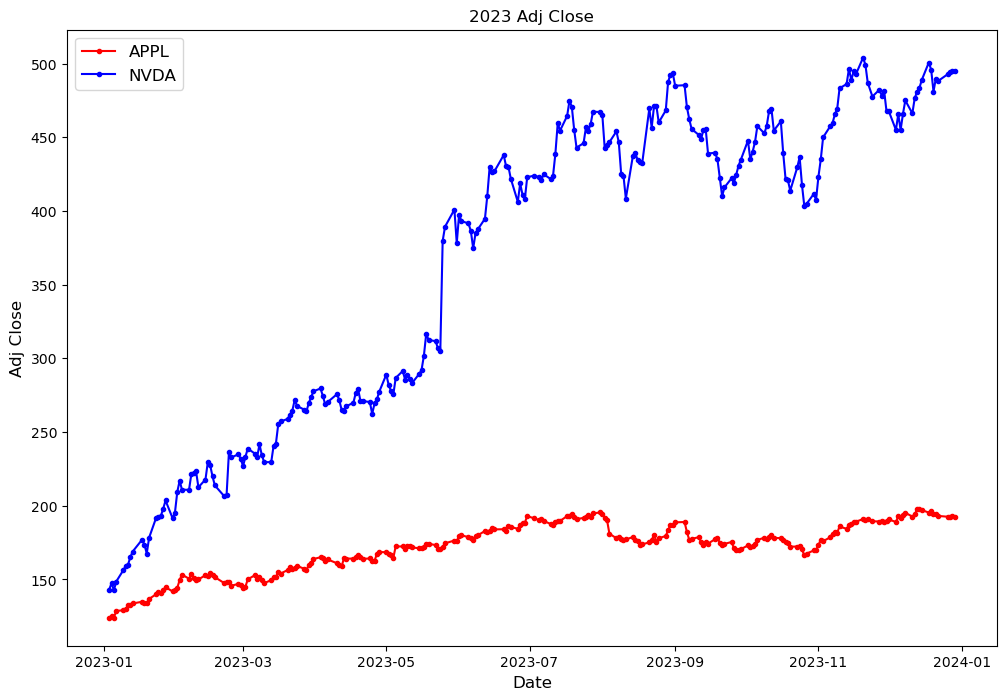

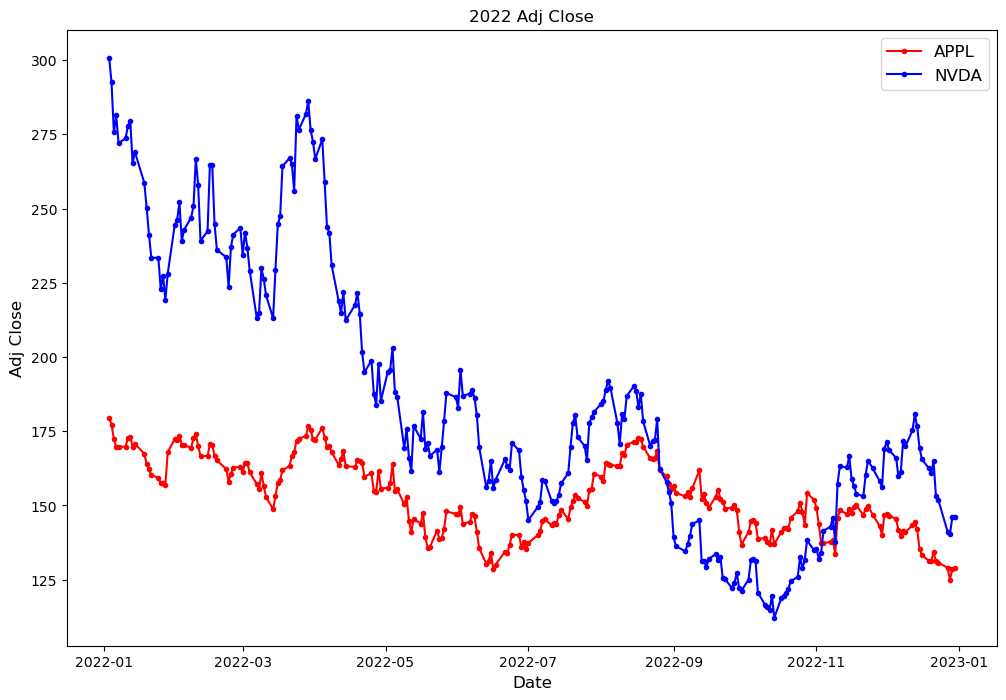

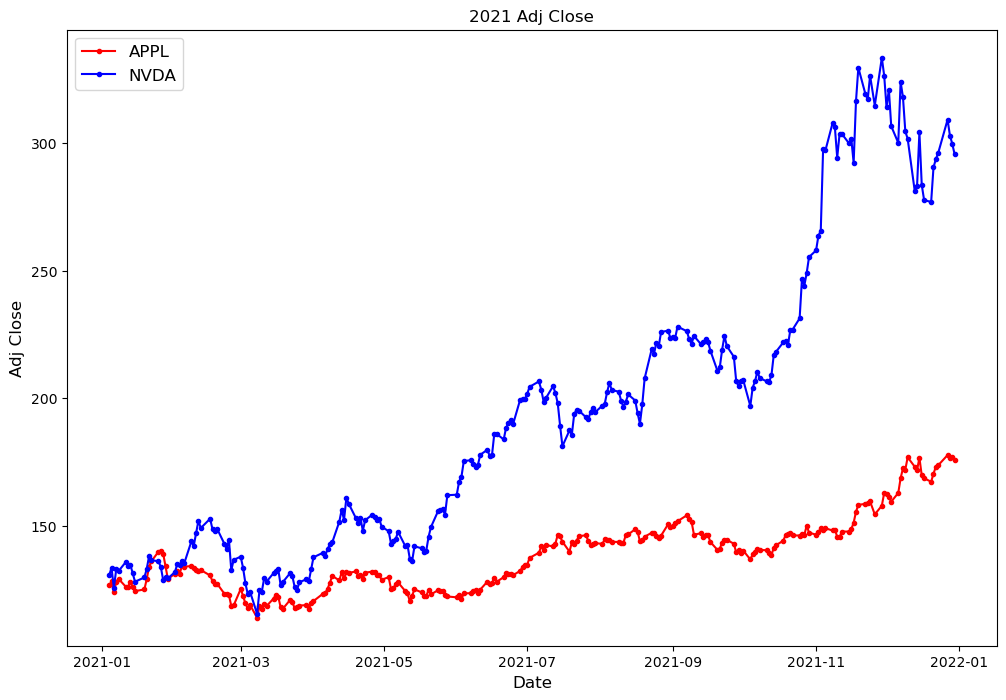

In [7]:
# Plot APPL and TSM
# Plot Adj Close
# Plot the main line with markers

# 2023
plt.figure(figsize=(12,8))
plt.plot(data_aapl_2023['Adj Close'],'.-',color='red',label='APPL')
plt.plot(data_nvda_2023['Adj Close'],'.-',color='blue',label='NVDA')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.title('2023 Adj Close')

plt.legend(fontsize=12)
plt.show()

# 2022
plt.figure(figsize=(12,8))
plt.plot(data_aapl_2022['Adj Close'],'.-',color='red',label='APPL')
plt.plot(data_nvda_2022['Adj Close'],'.-',color='blue',label='NVDA')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.title('2022 Adj Close')

plt.legend(fontsize=12)
plt.show()

#2021
plt.figure(figsize=(12,8))
plt.plot(data_aapl_2021['Adj Close'],'.-',color='red',label='APPL')
plt.plot(data_nvda_2021['Adj Close'],'.-',color='blue',label='NVDA')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.title('2021 Adj Close')

plt.legend(fontsize=12)
plt.show()

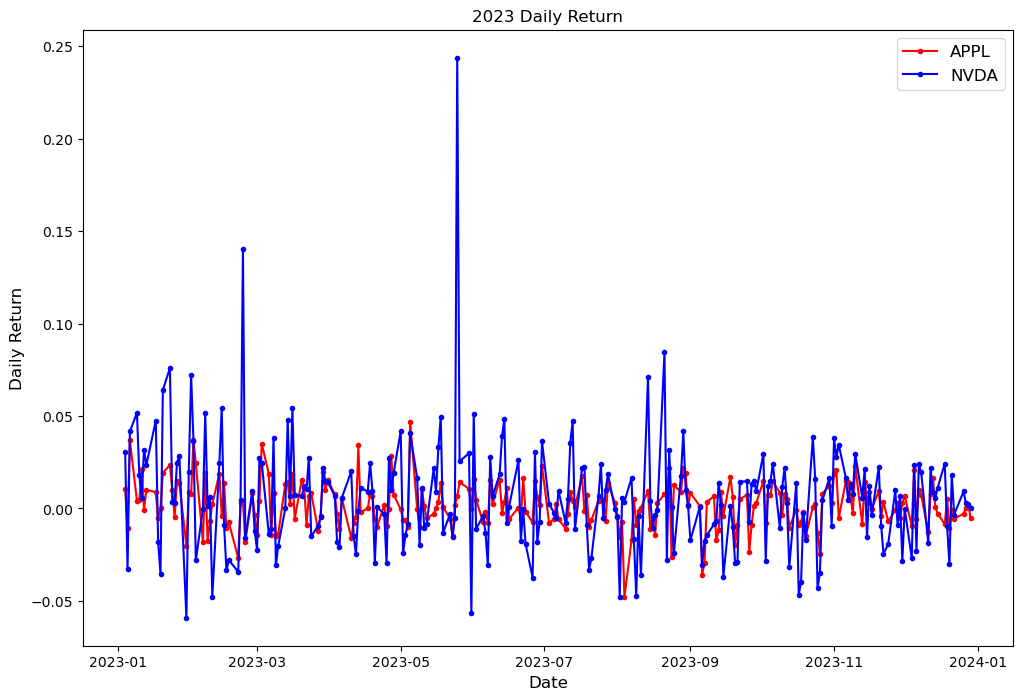

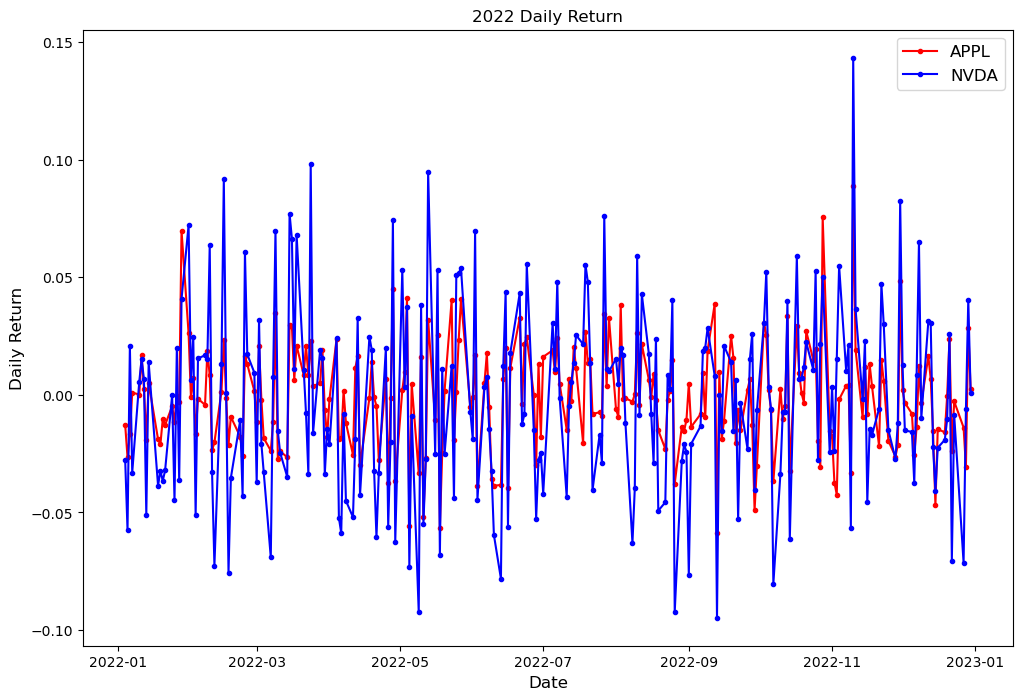

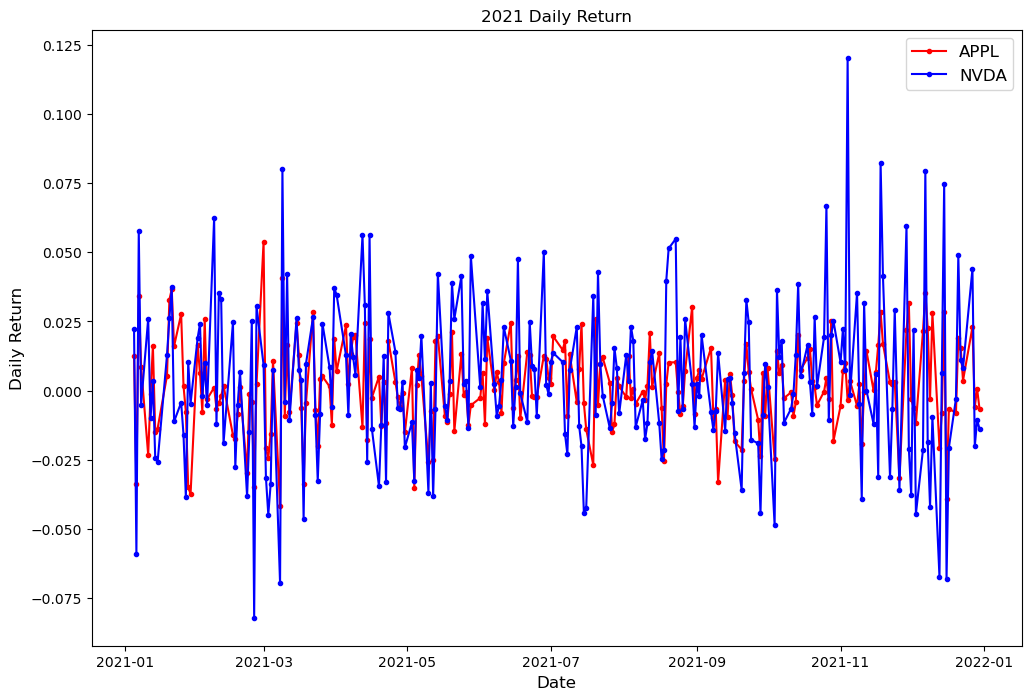

In [8]:
# Plot APPL and TSM
# Plot Adj Close
# Plot the main line with markers

# 2023
plt.figure(figsize=(12,8))
plt.plot(data_aapl_2023['Daily Return'],'.-',color='red',label='APPL')
plt.plot(data_nvda_2023['Daily Return'],'.-',color='blue',label='NVDA')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Return', fontsize=12)
plt.title('2023 Daily Return')

plt.legend(fontsize=12)
plt.show()

# 2022
plt.figure(figsize=(12,8))
plt.plot(data_aapl_2022['Daily Return'],'.-',color='red',label='APPL')
plt.plot(data_nvda_2022['Daily Return'],'.-',color='blue',label='NVDA')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Return', fontsize=12)
plt.title('2022 Daily Return')

plt.legend(fontsize=12)
plt.show()

#2021
plt.figure(figsize=(12,8))
plt.plot(data_aapl_2021['Daily Return'],'.-',color='red',label='APPL')
plt.plot(data_nvda_2021['Daily Return'],'.-',color='blue',label='NVDA')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Return', fontsize=12)
plt.title('2021 Daily Return')

plt.legend(fontsize=12)
plt.show()

In [9]:
test_mismatch_date = (data_nvda_2023.index == data_aapl_2023.index)

In [10]:
np.unique(test_mismatch_date)

array([ True])

## GC for 2023

First, test for stationary

In [23]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

#adf_aapl_2023 = adfuller(data_aapl_2023['Adj Close'][1:].values)
adf_aapl_2023 = adfuller(data_aapl_2023['Adj Close'].values)
print("ADF test for AAPL Adj Close:")
print()
print("ADF Statistics:", adf_aapl_2023[0])
print("p-value:", adf_aapl_2023[1])

#kpss_aapl_2023 = kpss(data_aapl_2023['Adj Close'][1:].values)
kpss_aapl_2023 = kpss(data_aapl_2023['Adj Close'].values)
print("KPSS test for AAPL Adj Close:")
print()
print("KPSS Statistics:", kpss_aapl_2023[0])
print("p-value:", kpss_aapl_2023[1])

print()
print()
adf_nvda_2023 = adfuller(data_nvda_2023['Adj Close'].values)
print("ADF test for NVDA Adj Close:")
print()
print("ADF Statistics:", adf_nvda_2023[0])
print("p-value:", adf_nvda_2023[1])

#kpss_aapl_2023 = kpss(data_aapl_2023['Adj Close'][1:].values)
kpss_nvda_2023 = kpss(data_nvda_2023['Adj Close'].values)
print("KPSS test for NVDA Adj Close:")
print()
print("KPSS Statistics:", kpss_nvda_2023[0])
print("p-value:", kpss_nvda_2023[1])

ADF test for AAPL Adj Close:

ADF Statistics: -2.586121692327979
p-value: 0.0958996903627557
KPSS test for AAPL Adj Close:

KPSS Statistics: 1.7159525223415206
p-value: 0.01


ADF test for NVDA Adj Close:

ADF Statistics: -1.7061801663307028
p-value: 0.42793111532495864
KPSS test for NVDA Adj Close:

KPSS Statistics: 2.1508442269849786
p-value: 0.01


C:\Users\teres\AppData\Local\Temp\ipykernel_31920\4005622595.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_aapl_2023 = kpss(data_aapl_2023['Adj Close'].values)
C:\Users\teres\AppData\Local\Temp\ipykernel_31920\4005622595.py:27: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_nvda_2023 = kpss(data_nvda_2023['Adj Close'].values)


ADF tests fail reject null hypothesis for AAPL's and TSM's Adj Close while KPSS tests reject both null hypothesis. Therefore, AAPL's and TSM's Adj Close are not stationary.

In [22]:
# Difference stationary
adf_aapl_diff_2023 = adfuller(data_aapl_2023['Adj Close Diff'][1:])
print("ADF test for 2023 AAPL Adj Close Diff:")
print()
print("ADF Statistics:", adf_aapl_diff_2023[0])
print("p-value:", adf_aapl_diff_2023[1])

kpss_aapl_diff_2023 = kpss(data_aapl_2023['Adj Close Diff'][1:])
print("KPSS test for 2023 AAPL Adj Close Diff:")
print()
print("KPSS Statistics:", kpss_aapl_diff_2023[0])
print("p-value:", kpss_aapl_diff_2023[1])

print()
print()

adf_nvda_diff_2023 = adfuller(data_nvda_2023['Adj Close Diff'][1:])
print("ADF test for 2023 NVDA Adj Close Diff:")
print()
print("ADF Statistics:", adf_nvda_diff_2023[0])
print("p-value:", adf_nvda_diff_2023[1])

kpss_nvda_diff_2023 = kpss(data_nvda_2023['Adj Close Diff'][1:])
print("KPSS test for 2023 NVDA Adj Close Diff:")
print()
print("KPSS Statistics:", kpss_nvda_diff_2023[0])
print("p-value:", kpss_nvda_diff_2023[1])

ADF test for 2023 AAPL Adj Close Diff:

ADF Statistics: -14.74873038893134
p-value: 2.5043324632503004e-27
KPSS test for 2023 AAPL Adj Close Diff:

KPSS Statistics: 0.25606619689452265
p-value: 0.1


ADF test for 2023 NVDA Adj Close Diff:

ADF Statistics: -15.57604622920835
p-value: 1.9593045267448427e-28
KPSS test for 2023 NVDA Adj Close Diff:

KPSS Statistics: 0.15943243035692342
p-value: 0.1


C:\Users\teres\AppData\Local\Temp\ipykernel_31920\788129484.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_aapl_diff_2023 = kpss(data_aapl_2023['Adj Close Diff'][1:])
C:\Users\teres\AppData\Local\Temp\ipykernel_31920\788129484.py:23: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_nvda_diff_2023 = kpss(data_nvda_2023['Adj Close Diff'][1:])


ADF tests reject null hypothesis for AAPL's and TSM's Adj Close while KPSS tests fail to reject both null hypothesis. Therefore, AAPL's and TSM's Adj Close Diff are stationary.

In [13]:
# Daily Return stationary
adf_aapl_daily_return_2023 = adfuller(data_aapl_2023['Daily Return'][1:])
print("ADF test for 2023 AAPL Daily Return:")
print("ADF Statistics:", adf_aapl_daily_return_2023[0])
print("p-value:", adf_aapl_daily_return_2023[1])

print()
kpss_aapl_daily_return_2023 = kpss(data_aapl_2023['Daily Return'][1:])
print("KPSS test for 2023 AAPL Daily Return:")
print("KPSS Statistics:", kpss_aapl_daily_return_2023[0])
print("p-value:", kpss_aapl_daily_return_2023[1])

print()
print()

adf_nvda_daily_return_2023 = adfuller(data_nvda_2023['Daily Return'][1:])
print("ADF test for 2023 TSM Daily Return:")
print("ADF Statistics:", adf_nvda_daily_return_2023[0])
print("p-value:", adf_nvda_daily_return_2023[1])

print()
kpss_nvda_daily_return_2023 = kpss(data_nvda_2023['Daily Return'][1:])
print("KPSS test for 2023 TSM Daily Return:")
print("KPSS Statistics:", kpss_nvda_daily_return_2023[0])
print("p-value:", kpss_nvda_daily_return_2023[1])

ADF test for 2023 AAPL Daily Return:
ADF Statistics: -14.864339052712628
p-value: 1.700440091354364e-27

KPSS test for 2023 AAPL Daily Return:
KPSS Statistics: 0.36915919886302623
p-value: 0.09044862117973007


ADF test for 2023 TSM Daily Return:
ADF Statistics: -10.417156653831293
p-value: 1.742365811370927e-18

KPSS test for 2023 TSM Daily Return:
KPSS Statistics: 0.49050749665703
p-value: 0.043804617870038295


ADF tests reject null hypothesis for AAPL's and TSM's Daily Return while KPSS tests fail to reject both null hypothesis. Therefore, AAPL's and TSM's Daily Return are stationary.

ADF rejects the Null hypothesis while KPSS fails to reject the Null hypothesis. This means both tests determine that the GOOG's Adj Close Diff is stationary.

## Apply GC test

We can only apply GC for stationary time series. The GC test will overestimate for non-stationary time series

In [14]:
from statsmodels.tsa.stattools import acf, pacf, grangercausalitytests

## Make copies for TSM Adj Close Diff and Daily Return

In [15]:
data_aapl_2023['NVDA Adj Close Diff'] = data_nvda_2023['Adj Close Diff'].copy()
data_aapl_2022['NVDA Adj Close Diff'] = data_nvda_2022['Adj Close Diff'].copy()
data_aapl_2021['NVDA Adj Close Diff'] = data_nvda_2021['Adj Close Diff'].copy()

data_aapl_2023['NVDA Daily Return'] = data_nvda_2023['Daily Return'].copy()
data_aapl_2022['NVDA Daily Return'] = data_nvda_2022['Daily Return'].copy()
data_aapl_2021['NVDA Daily Return'] = data_nvda_2021['Daily Return'].copy()

## GC matrix

In [16]:
cols = ['Adj Close Diff','NVDA Adj Close Diff','Daily Return','NVDA Daily Return']
df_2023 = data_aapl_2023[cols].copy()
df_2022 = data_aapl_2022[cols].copy()
df_2021 = data_aapl_2021[cols].copy()
df_2023 = df_2023.dropna()
df_2022 = df_2022.dropna()
df_2021 = df_2021.dropna()

In [17]:
df_2023

,Adj Close Diff,NVDA Adj Close Diff,Daily Return,NVDA Daily Return
Date,,,,
2023-01-04,1.279457,4.337891,0.010314,0.030318
2023-01-05,-1.329048,-4.837631,-0.010605,-0.032816
2023-01-06,4.562408,5.937088,0.036794,0.041640
2023-01-09,0.525665,7.686234,0.004089,0.051753
2023-01-10,0.575256,2.808594,0.004456,0.017980
...,...,...,...,...
2023-12-22,-1.077133,-1.599945,-0.005547,-0.003266
2023-12-26,-0.548553,4.489838,-0.002841,0.009195
2023-12-27,0.099716,1.379913,0.000518,0.002800


In [18]:
print("Granger Causality in 2023")

grangers_causation_matrix(df_2023, variables=df_2023.columns)

Granger Causality in 2023


,Adj Close Diff_x,NVDA Adj Close Diff_x,Daily Return_x,NVDA Daily Return_x
Adj Close Diff_y,1.000,0.0158,0.4980,0.0064
NVDA Adj Close Diff_y,0.680,1.0000,0.6444,0.2467
Daily Return_y,0.357,0.0223,1.0000,0.0040
NVDA Daily Return_y,0.599,0.1011,0.4661,1.0000


In [19]:
print("Granger Causality in 2022")

grangers_causation_matrix(df_2022, variables=df_2022.columns)

Granger Causality in 2022


,Adj Close Diff_x,NVDA Adj Close Diff_x,Daily Return_x,NVDA Daily Return_x
Adj Close Diff_y,1.0000,0.2465,0.4144,0.2582
NVDA Adj Close Diff_y,0.1740,1.0000,0.2035,0.0222
Daily Return_y,0.4069,0.2773,1.0000,0.2617
NVDA Daily Return_y,0.2054,0.0493,0.1912,1.0000


In [20]:
print("Granger Causality in 2021")
grangers_causation_matrix(df_2021, variables=df_2021.columns)

Granger Causality in 2021


,Adj Close Diff_x,NVDA Adj Close Diff_x,Daily Return_x,NVDA Daily Return_x
Adj Close Diff_y,1.0000,0.0122,0.0349,0.1559
NVDA Adj Close Diff_y,0.0045,1.0000,0.0091,0.0149
Daily Return_y,0.0724,0.0328,1.0000,0.1525
NVDA Daily Return_y,0.0031,0.0100,0.0037,1.0000


## GC for Adj Close Diff

Null Hypothesis: X does not GC Y
If we reject the null hypothesis, it means X GC Y

In [ ]:
## Null hypothesis: 2023 TSM's Adj Close Diff does not GC 2023 AAPL (second column GC first column)
TSM_GC_AAPL_2023_Diff = grangercausalitytests(data_aapl_2023[['Adj Close Diff', 'TSM Adj Close Diff']].dropna(), maxlag=5)
TSM_GC_AAPL_2023_Diff[1][0]['ssr_ftest'][1]
print()
print()
for key,val in TSM_GC_AAPL_2023_Diff.items():
    p = TSM_GC_AAPL_2023_Diff[key][0]['ssr_ftest'][1]
    if p < 0.05:
        print("GC test rejects null hypothesis at p =", p, "for lag =", key)
        print('TSM Adj Close Diff GC AAPL Adj Close Diff in 2023')

In [ ]:
TSM_GC_AAPL_2022_Diff = grangercausalitytests(data_aapl_2022[['Adj Close Diff', 'TSM Adj Close Diff']].dropna(), maxlag=5)
TSM_GC_AAPL_2022_Diff[1][0]['ssr_ftest'][1]
print()
print()
for key,val in TSM_GC_AAPL_2022_Diff.items():
    p = TSM_GC_AAPL_2022_Diff[key][0]['ssr_ftest'][1]
    if p < 0.05:
        print("GC test rejects null hypothesis at p =", p, "for lag =", key)
        print('TSM Adj Close Diff GC AAPL Adj Close Diff in 2022')

In [ ]:
TSM_GC_AAPL_2021_Diff = grangercausalitytests(data_aapl_2021[['Adj Close Diff', 'TSM Adj Close Diff']].dropna(), maxlag=5)
TSM_GC_AAPL_2021_Diff[1][0]['ssr_ftest'][1]
print()
print()
for key,val in TSM_GC_AAPL_2021_Diff.items():
    p = TSM_GC_AAPL_2021_Diff[key][0]['ssr_ftest'][1]
    if p < 0.05:
        print("GC test rejects null hypothesis at p =", p, "for lag =", key)
        print('TSM Adj Close Diff GC AAPL Adj Close Diff in 2021')

In [ ]:
AAPL_GC_TSM_2023_Diff = grangercausalitytests(data_aapl_2023[['TSM Adj Close Diff','Adj Close Diff']].dropna(), maxlag=5)

for key,val in AAPL_GC_TSM_2023_Diff.items():
    q = AAPL_GC_TSM_2023_Diff[key][0]['ssr_ftest'][1]
    if q < 0.05:
        print("GC test rejects null hypothesis at p =", q, "for lag =", key)
        print('AAPL Adj Close Diff GC TSM Adj Close Diff in 2023')

In [ ]:
AAPL_GC_TSM_2022_Diff = grangercausalitytests(data_aapl_2022[['TSM Adj Close Diff','Adj Close Diff']].dropna(), maxlag=5)

print()
print()
for key,val in AAPL_GC_TSM_2022_Diff.items():
    q = AAPL_GC_TSM_2022_Diff[key][0]['ssr_ftest'][1]
    if q < 0.05:
        print("GC test rejects null hypothesis at p =", q, "for lag =", key)
        print('AAPL Adj Close Diff GC TSM Adj Close Diff in 2022')

In [ ]:
AAPL_GC_TSM_2021_Diff = grangercausalitytests(data_aapl_2021[['TSM Adj Close Diff','Adj Close Diff']].dropna(), maxlag=5)

print()
print()
for key,val in AAPL_GC_TSM_2021_Diff.items():
    q = AAPL_GC_TSM_2021_Diff[key][0]['ssr_ftest'][1]
    if q < 0.05:
        print("GC test rejects null hypothesis at p =", q, "for lag =", key)
        print('AAPL Adj Close Diff GC TSM Adj Close Diff in 2021')

## GC for Daily Return

In [ ]:
## Null hypothesis: 2023 TSM's Adj Close Diff does not GC 2023 AAPL (second column GC first column)
TSM_GC_AAPL_2023_Daily = grangercausalitytests(data_aapl_2023[['Daily Return', 'TSM Daily Return']].dropna(), maxlag=5)

print()
print()
for key,val in TSM_GC_AAPL_2023_Daily.items():
    p = TSM_GC_AAPL_2023_Daily[key][0]['ssr_ftest'][1]
    if p < 0.05:
        print("GC test rejects null hypothesis at p =", p, "for lag =", key)
        print('TSM Daily Return GC AAPL Daily Return in 2023')

In [ ]:
TSM_GC_AAPL_2022_Daily = grangercausalitytests(data_aapl_2022[['Daily Return', 'TSM Daily Return']].dropna(), maxlag=5)

print()
print()
for key,val in TSM_GC_AAPL_2022_Daily.items():
    p = TSM_GC_AAPL_2022_Daily[key][0]['ssr_ftest'][1]
    if p < 0.05:
        print("GC test rejects null hypothesis at p =", p, "for lag =", key)
        print('TSM Daily Return GC AAPL Daily Return in 2022')

In [ ]:
TSM_GC_AAPL_2021_Daily = grangercausalitytests(data_aapl_2021[['Daily Return', 'TSM Daily Return']].dropna(), maxlag=5)

print()
print()
for key,val in TSM_GC_AAPL_2021_Daily.items():
    p = TSM_GC_AAPL_2021_Daily[key][0]['ssr_ftest'][1]
    if p < 0.05:
        print("GC test rejects null hypothesis at p =", p, "for lag =", key)
        print('TSM Daily Return GC AAPL Daily Return in 2021')

## Remove 5 dates and use VAR(2) for Adj Close, Daily Return.
Create a dataframe consist adj close and apply var on transform data
https://github.com/KidQuant/Forecasting-VAR-Granger-Causality/blob/master/Forecasting-VAR-Granger-Causlity.ipynb

In [ ]:
df_removed = data_aapl_2023.copy()
df_removed.columns

In [ ]:
random_state=3241
np.random.seed(random_state)

missing_dates = np.random.choice(df_removed.index, size=5, replace=False)
missing_dates = sorted(missing_dates)
df_removed.loc[missing_dates,['Open','High','Low','Close','Adj Close','Volume','Adj Close Diff','Adj Close Prev','Daily Return']] = np.nan

In [ ]:
df_removed.loc[missing_dates]

In [ ]:
imputed_indices = df_removed[df_removed['Adj Close'].isnull()].index

In [ ]:
grangercausalitytests(df_removed[['Daily Return', 'TSM Daily Return']].dropna(), maxlag=5)

## VAR model

In [ ]:
from statsmodels.tsa.api import VAR

In [ ]:
df_imputed = df_removed.copy()
df_imputed.info()

In [ ]:
df_imputed

In [ ]:
df_imputed_transformed = df_imputed.dropna()

In [ ]:
df_imputed_transformed=df_imputed_transformed.drop(['Open','High','Low','Close','Adj Close','Adj Close Prev','Volume'], axis=1)
df_imputed_transformed

In [ ]:
model = VAR(df_imputed_transformed)

In [ ]:
results = model.fit(2)

In [ ]:
results.summary()

In [ ]:
model.select_order(15)

## Remove five dates from data frame (including open, close, high, low, volume and adj close) 

In [ ]:
df = data_aapl_2023.copy()

In [ ]:
df

In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
#missing_dates
missing_dates = sorted(missing_dates)

In [ ]:
df.loc[missing_dates,['Open','High','Low','Close','Adj Close','Volume','Adj Close Diff','Adj Close Prev','Daily Return']] = np.nan

In [ ]:
df.loc[missing_dates]

In [ ]:
df

In [ ]:
imputed_indices = df[df['Adj Close'].isnull()].index

In [ ]:
imputed_indices

In [ ]:
# Plot APPL and ITW
# Plot Adj Close
# Plot the main line with markers
plt.figure(figsize=(12,8))
plt.plot(data['Adj Close'].diff(),'.-',color='red',label='APPL')
plt.plot(data_ITW['Adj Close'].diff(),'.-',color='blue',label='ITW')

# Set labels
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.title('Adj Close Difference between APPL and ITW')

plt.legend(fontsize=12)
plt.show()

In [ ]:
cols = ['Daily Return','TSM Daily Return','Adj Close Diff','TSM Adj Close Diff']
df_2023 = data_aapl_2023[cols].copy()
df_2022 = data_aapl_2022[cols].copy()
df_2021 = data_aapl_2021[cols].copy()